## $$\text{Análisis del discriminante lineal}$$

Objetivo: Reducir el número de columnas de un datasets para hacer que los algoritmo reduzcan el tiempo de entrenamiento.

**Paso 1:** Aplicar escalado de variables a la matriz de características X, formada por n variables independientes.

**Paso 2:** sea `C` el número de clases, calcular C vectores m-dimensionales, de modo que cada uno contenga las medias de las características de las observaciones para cada clase.

Ex: Supongamos que las VD tienen dos clases 0 y 1, y sea $x_j^i$ la característica j-ésima de la observación i-ésima, entonces:
![](./img/lda1.png)

**Paso 3:** Calculamos la matriz de productos cruzados centrados en la media para cada clase, que mide la varianza dentro de cada clase.

Con nuestro ejemplo de las clase 0 y 1, las dos matrices de productos cruzados $S_o$ y $S_1$ para las respectivas clase 0 y 1 son:
![](./img/lda2.png)

**Paso 4:** Calculamos la covarianza normalizada de todas las matrices anteriores, W.

Con nuestro ejemplo de las clases 0 y 1, la covarianza normalizada W es simplemente:
$$W = \frac{1}{n_0}S_0 + \frac{1}{n_1}S_1$$

**Paso 5:** Calculamos la matriz de covarianza global entre clases B es simplemente:
![](./img/lda3.png)

**Paso 6:** Calculamos los valores y vectores propios de la matriz:
$$W^{-1}B$$

**Paso 7:** Elegimos los p valores propios más grandes como el número de dimensiones reducidas.


Mas información : [aqui](https://sebastianraschka.com/Articles/2014_python_lda.html)

In [2]:
import pandas as pd 
import numpy as np

dataset = pd.read_csv('./data/Wine.csv')

x = dataset.iloc[:,0:-1].values
y = dataset.iloc[:,-1].values

from sklearn.model_selection import train_test_split 

xtrain, xtest, ytrain, ytest = train_test_split(x,y,random_state=0,test_size=0.2)
from sklearn.preprocessing import StandardScaler 

scx = StandardScaler()
xtrain = scx.fit_transform(xtrain)
xtest = scx.transform(xtest)

### Reducimos la dimensionalidad con LDA

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
# al ser un algoritmo supervisado (al contrario del PCA) necesitamos suministrarle la información de las clases
xtrain = lda.fit_transform(xtrain,ytrain)
xtest = lda.transform(xtest)

In [5]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)

ypred = classifier.predict(xtest)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
cm

array([[14,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  6]])

### Representación visual para el conjunto de test

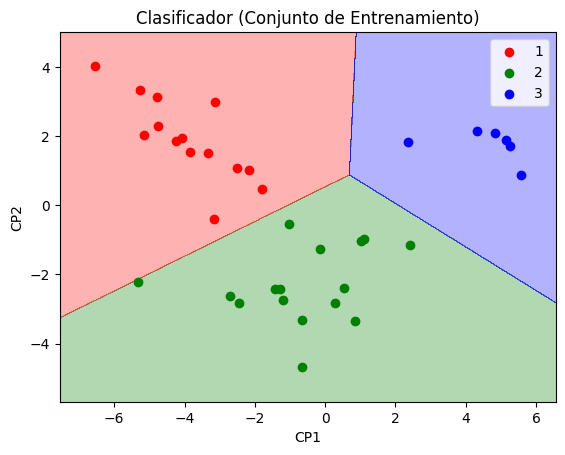

In [7]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X_set, y_set = xtest, ytest
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.3, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Clasificador (Conjunto de Entrenamiento)')
plt.xlabel('CP1')
plt.ylabel('CP2')
plt.legend()
plt.show()